# BanditPAM (Image Demo)

<img src='https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png' width='250'>

In [5]:
from banditpam import KMedoids
from sklearn.cluster import KMeans        # for comparison
from PIL import Image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

## Data preparation

We use `imagenette`, a ten class subset of imagenet. The classes here are: tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute

In [14]:
# download an image dataset
! wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz

--2022-01-19 00:04:00--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.113.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.113.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.42M  10.7MB/s    in 9.5s    

2022-01-19 00:04:10 (9.98 MB/s) - ‘imagenette2-160.tgz’ saved [99003388/99003388]



In [21]:
# extract the dataset
! tar xf imagenette2-160.tgz -C data/

Example of one image from the dataset:  
<img src='data/imagenette2-160/train/n01440764/ILSVRC2012_val_00000293.JPEG'>

In [2]:
files_basedir = Path('data') / 'imagenette2-160' / 'train' 

In [9]:
files = sorted(files_basedir.glob('n0*/*.JPEG'))

Some helper functions to process the images

In [10]:
def crop_center(im, crop_width, crop_height):
    img_width, img_height = im.size
    return im.crop(((img_width - crop_width) // 2,
                    (img_height - crop_height) // 2,
                    (img_width + crop_width) // 2,
                    (img_height + crop_height) // 2))

In [67]:
def process(p: Path) -> np.ndarray:
    """load image, downscale, crop to 80x80, and return flattened ndarray"""
    im = Image.open(p)
    im = crop_center(im, 160, 160)
    im.thumbnail((80,80), Image.ANTIALIAS)
    flattened = np.asarray(im).ravel()
    return flattened

In [68]:
raw = [process(f) for f in files]

In [69]:
X = np.vstack([r for r in raw if len(r) == 80*80*3])[::4] # subsample by 4

In [70]:
X.shape

(2324, 19200)

## KMeans

In [71]:
# Fit the data with KMeans (sklearn)
kmean = KMeans(n_clusters=10)
kmean.fit(X, 'L2')
#kmean.labels_

KMeans(n_clusters=10)

## K-Mediods

In [72]:
# Fit the data with BanditPAM:
kmed = KMedoids(n_medoids=10, algorithm="BanditPAM")
kmed.fit(X, 'L2')
#kmed.labels

## Results 
Select a class id for demo purposes and compare cluster center/ medoid results

In [91]:
class_id = 8

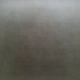

In [92]:
Image.fromarray(np.uint8(kmean.cluster_centers_[class_id]).reshape((80,80,3)))

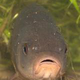

In [93]:
Image.fromarray(np.uint8(X[kmed.medoids[class_id]]).reshape((80,80,3)))